# Part I - (Ford GoBike System Dataset Exploration)
## by (Divine)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_1 = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print(df_1.shape)
print(df_1.dtypes)
print(df_1.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

Convert the following data columns to the appropriate data types they should be. 

- start_time     to              timeframe datatype
- end_time         to           timeframe datatype
- user_type          to         categorical datatype
- bike_share_for_all_trip  to   categorical datatype
- member_gender        to       categorical datatype

In [4]:
#df_1['member_gender'] = df_1['member_gender'].astype('category')

for col in ['member_gender', 'user_type' , 'bike_share_for_all_trip']:
    df_1[col] = df_1[col].astype('category')

In [5]:
for col in ['start_time' , 'end_time' ]:
    df_1[col] =  pd.to_datetime(df_1[col]) 


In [6]:
print(df_1.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object


In [7]:
print(df_1.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

### What is the structure of your dataset?


There are 183412 individual ride logs in the dataset with 16 recorded data variables per ride log (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are numeric in nature, however the variables start_time, end_time, member_birth_year are of the datetime datatype and member_gender is a category datatype. 

### What is/are the main feature(s) of interest in your dataset?


In the analysis on the given dataset, we look to focus on the following;

Mean Duration of rides... 
Prime time of the day when users go for the GoBike service... 
Start stations that get (start) the most rides
End stations that logged the most rides (were the bikes end up). 
Also if there are more one-time customers than subscribers (would help which way to promite the business). 
Demographic analysis of users (age and sex (Mean Age))... 
 




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


The duration_sec, start_station_ID, end_station_ID, user_type, member_birth_year, member_gender variables will be very helpful to develop insights from our datset. 

## Univariate Exploration

In this section we use the "Question-Visualization-Observations" framework for explorative analysis of various variables in the dataset. 



We begin by looking at the distribution of the first variable of interest: duration of the ride (duration_sec)

Question: What does the distribution of the duration_sec variable look like?


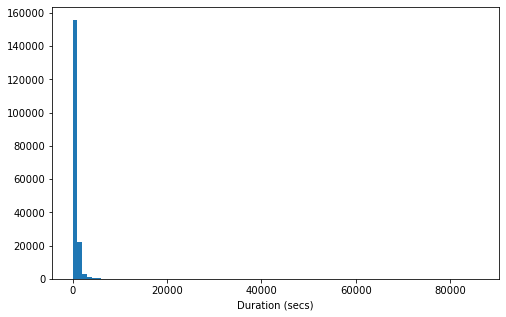

In [8]:
binsize = 1000
bins = np.arange(0, df_1['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_1, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (secs)')
plt.show()

Observation: The duration_sec distribution is unimodal at a point below 500. 
The distribution is not cleraly visible, this is because of the presence of an outlier (as confirmed in the outout of df_1.describe() , where max = 85444)

The initial plot of the duration_sec variable show some immediate points of attention. On the plot, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits on the plot also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [39]:
df_1['duration_sec'].mode()

0    272
Name: duration_sec, dtype: int64

<AxesSubplot:xlabel='duration_sec'>

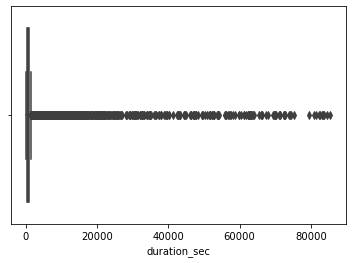

In [35]:
sb.boxplot(x='duration_sec', data=df_1)

In [9]:
# select low outliers, using criteria eyeballed from the plots

low_outliers = (df_1['duration_sec'] < 0) 
print(low_outliers.sum())
print(df_1.loc[low_outliers,:]) 

0
Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip]
Index: []


In [10]:
# select high outliers, using criteria eyeballed from the plots

high_outliers = (df_1['duration_sec'] > 10000)
print(high_outliers.sum())
print(df_1.loc[high_outliers,:])
                 
#print (high_outliers)

461
        duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1              42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
199            15123 2019-02-28 18:23:19.035 2019-02-28 22:35:22.294   
...              ...                     ...                     ...   
179155         15408 2019-02-01 10:59:57.927 2019-02-01 15:16:46.059   
179732         10568 2019-02-01 10:08:37.189 2019-02-01 13:04:45.198   
182411         13609 2019-02-01 04:38:43.601 2019-02-01 08:25:33.493   
183215         17953 2019-02-01 01:39:13.098 2019-02-01 06:38:26.681   
183306         13251 2019-02-01 01:03:11.362 2019-02-01 04:44:03.321   

        start_station_id                                start_station_name  \
0                   21.0  Montgomery St BART Station 

The outliers seem to be valid points as they are quite a number of ride logs with higher duration than 10000 seconds. 

Next we look into the distribution of another variable of interest: start_station_id

Question: What does the distribution of the start_station_id variable look like?

In [11]:
start_station_id_list = df_1['start_station_id'].unique()

In [12]:
start_station_id_list

array([ 21.,  23.,  86., 375.,   7.,  93., 300.,  10.,  19., 370.,  44.,
       127., 252., 243., 349., 131.,  74., 321., 180.,  72., 163., 190.,
         6.,  78., 258., 238.,  28., 109.,  98., 133., 113., 220., 122.,
        58.,  87.,  15., 104.,  27.,   9., 140., 310.,  53., 106., 340.,
       121.,  11., 240.,  61.,  36.,  34.,  13., 345.,  43., 239., 182.,
       119., 369., 159., 254.,  30., 356., 324.,  71.,  67., 250., 245.,
       377., 317., 219., 274.,  77., 129., 253., 386.,  95., 183.,   5.,
       137.,  73., 176., 197., 136.,  33.,  59., 115., 280., 262., 368.,
       385.,  90., 112., 160.,   4., 247.,  97., 308.,  75., 123., 172.,
       114., 244.,   8.,  55.,  31.,  62., 125.,  49., 194., 263., 120.,
       371., 107., 144.,  70.,  47., 148., 383.,  17., 281.,  66.,  76.,
       338.,  92., 336., 155., 235., 339., 323., 311., 141., 171., 350.,
       166., 223., 312., 380., 110., 181.,  79.,  16.,  39., 266., 246.,
        14.,  88.,   3., 154., 215., 126., 149.,  8

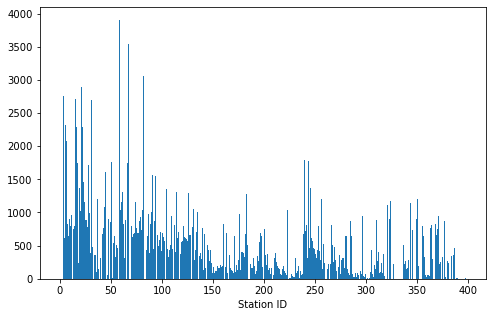

In [13]:
binsize = 1
bins = np.arange(0, df_1['start_station_id'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_1, x = 'start_station_id', bins = bins)
plt.xlabel('Station ID')
plt.show()

Station IDs are unique numeric identifiers for various station names. 

Observation: The distribution of station IDs is unimodal at a point close to 60(+-5). This indicates that ride logs were statrted at the modal station ID (i.e. that station ID had the most rides started there). 
The below code block outputs confirm the graphical visualisation output as it shows that station ID 58 is the station with the most rides logged. 

Station ID 58 - Market station at 10th St

The GoBike organisation can find out why this happens and build/improve on it, for better service. 




<AxesSubplot:xlabel='start_station_id'>

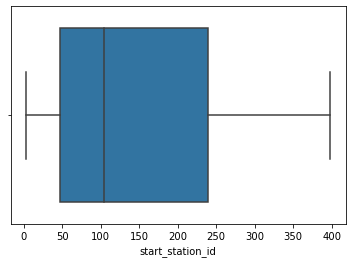

In [36]:
sb.boxplot(x='start_station_id', data=df_1)

In [14]:
df_1['start_station_id'].mode()

0    58.0
Name: start_station_id, dtype: float64

In [15]:
df_1.loc[ df_1['start_station_id'] == 58.0].start_station_name

38        Market St at 10th St
54        Market St at 10th St
110       Market St at 10th St
114       Market St at 10th St
190       Market St at 10th St
                  ...         
183362    Market St at 10th St
183364    Market St at 10th St
183365    Market St at 10th St
183366    Market St at 10th St
183371    Market St at 10th St
Name: start_station_name, Length: 3904, dtype: object

Next we look into the distribution of another variable of interest: end_station_id

Question: What does the distribution of the end_station_id variable look like?

In [16]:
end_station_id_list = df_1['end_station_id'].unique()

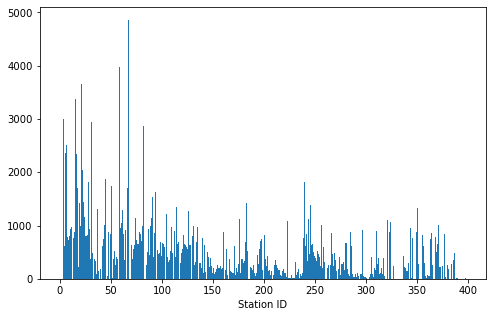

In [17]:
binsize = 1
bins = np.arange(0, df_1['end_station_id'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_1, x = 'end_station_id', bins = bins)
plt.xlabel('Station ID')
plt.show()

Observation: The distribution of station IDs is unimodal at a point close to 60(+-10). This indicates that ride logs were ended at the modal station ID (i.e. that station ID had the most rides ended there). 
The below code block outputs confirm the graphical visualisation output as it shows that station ID 58 is the station with the most rides logged. 

Station ID 67 - San Francisco Caltrain Station 2

The GoBike organisation can find out why this happens and build/improve on it, for better service. 

<AxesSubplot:xlabel='end_station_id'>

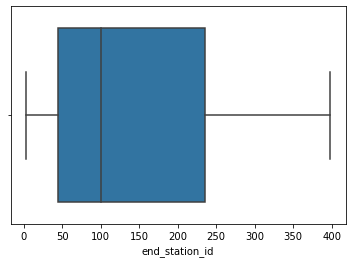

In [37]:
sb.boxplot(x='end_station_id', data=df_1)

In [18]:
df_1['end_station_id'].mode()

0    67.0
Name: end_station_id, dtype: float64

In [19]:
df_1.loc[ df_1['start_station_id'] == 67.0].start_station_name

85        San Francisco Caltrain Station 2  (Townsend St...
89        San Francisco Caltrain Station 2  (Townsend St...
184       San Francisco Caltrain Station 2  (Townsend St...
188       San Francisco Caltrain Station 2  (Townsend St...
242       San Francisco Caltrain Station 2  (Townsend St...
                                ...                        
183126    San Francisco Caltrain Station 2  (Townsend St...
183158    San Francisco Caltrain Station 2  (Townsend St...
183178    San Francisco Caltrain Station 2  (Townsend St...
183289    San Francisco Caltrain Station 2  (Townsend St...
183399    San Francisco Caltrain Station 2  (Townsend St...
Name: start_station_name, Length: 3544, dtype: object

Next we look into the distribution of another variable of interest: member brith year 

Question: What does the distribution of the member_birth_year variable look like?

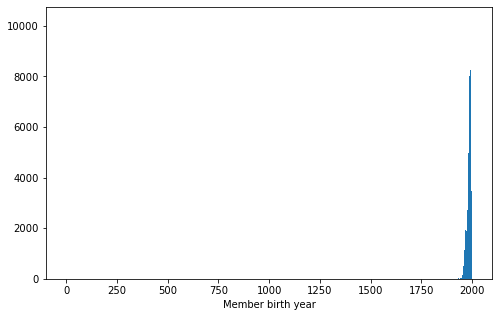

In [20]:
binsize = 1
bins = np.arange(0, df_1['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_1, x = 'member_birth_year', bins = bins)
plt.xlabel('Member birth year')
plt.show()

In [38]:
df_1['member_birth_year'].mode()

0    1988.0
Name: member_birth_year, dtype: float64

Observation: The distribution shows that member_birth_year variable is unimodal at the pount 1988, with another point close to the modal value. This indicates that most users were born in the year 1988. 
The boxplot below helps us visualize the member_birth_year distribution better as it shows that most user birth years fall between 1980 and 1994. It also shows that data has some outliers which are probably wrong information, between points 1876 and 1960. 


<AxesSubplot:xlabel='member_birth_year'>

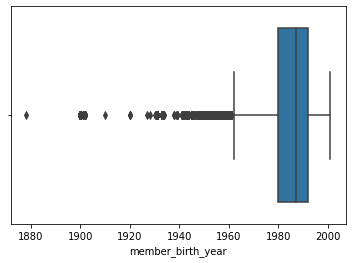

In [34]:
sb.boxplot(x='member_birth_year', data=df_1)

In [42]:
# select low outliers, using criteria eyeballed from the plots

birth_year_low_outliers = (df_1['member_birth_year'] < 1940) 
print(low_outliers.sum())
print(df_1.loc[low_outliers,:]) 

203
        duration_sec              start_time                end_time  \
1285             148 2019-02-28 19:29:17.627 2019-02-28 19:31:45.967   
5197             217 2019-02-28 13:51:46.238 2019-02-28 13:55:24.127   
5266             384 2019-02-28 13:35:05.428 2019-02-28 13:41:30.223   
5447             147 2019-02-28 13:08:56.935 2019-02-28 13:11:24.062   
10827           1315 2019-02-27 19:21:34.436 2019-02-27 19:43:30.008   
...              ...                     ...                     ...   
177885           517 2019-02-01 18:38:40.471 2019-02-01 18:47:18.392   
177955           377 2019-02-01 18:23:33.411 2019-02-01 18:29:50.795   
179280           355 2019-02-01 14:32:42.247 2019-02-01 14:38:37.896   
182830           428 2019-02-01 07:45:05.934 2019-02-01 07:52:14.922   
183388           490 2019-02-01 00:39:53.112 2019-02-01 00:48:03.338   

        start_station_id                                 start_station_name  \
1285               158.0                      Shattu

In [43]:
# remove points with incorrect member_birth_year values.
df_1 = df_1.loc[-birth_year_low_outliers,:]

In [45]:
df_1.loc[df_1['member_birth_year'] < 1940]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


We then try to visualize the distribution of member_birth_year variable without the oulying data points. 


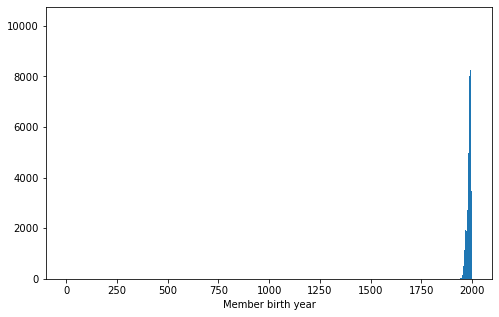

In [49]:
binsize = 1
bins = np.arange(0, df_1['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_1, x = 'member_birth_year', bins = bins)
plt.xlabel('Member birth year')
plt.show()

<AxesSubplot:xlabel='member_birth_year'>

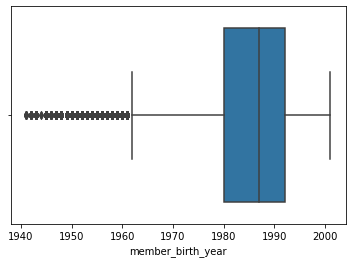

In [50]:
sb.boxplot(x='member_birth_year', data=df_1)

In [51]:
# form a member age column from the member birth year data

member_age = 2022 - df_1.member_birth_year 

In [52]:
member_age

0         38.0
1          NaN
2         50.0
3         33.0
4         48.0
          ... 
183407    26.0
183408    38.0
183409    32.0
183410    34.0
183411    33.0
Name: member_birth_year, Length: 183209, dtype: float64

In [56]:
df_1['member_age'] = member_age

#df_1['member_age'] = df_1.assign('member_age' == member_age.values , index = df_1.index)

#df_1['member_age'] = pd.series(member_age , index=df1.index )
#df1['e'] = pd.Series(np.random.randn(sLength), index=df1.index)

In [57]:
df_1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0


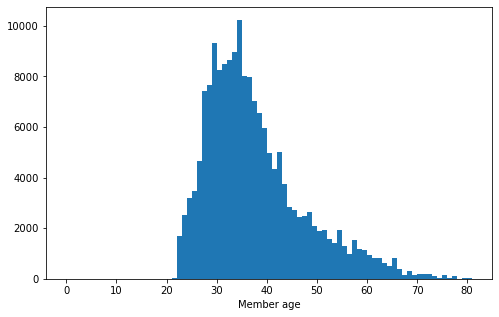

In [58]:
binsize = 1
bins = np.arange(0, df_1['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_1, x = 'member_age', bins = bins)
plt.xlabel('Member age')
plt.show()

<AxesSubplot:xlabel='member_age'>

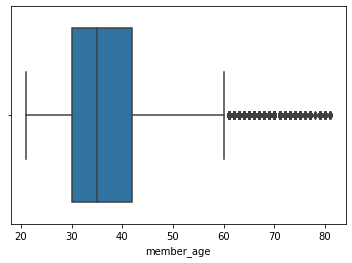

In [59]:
sb.boxplot(x='member_age', data=df_1)

Next we look into the distribution of another variable of interest: user_type

Question: What does the distribution of the user_type variable look like?

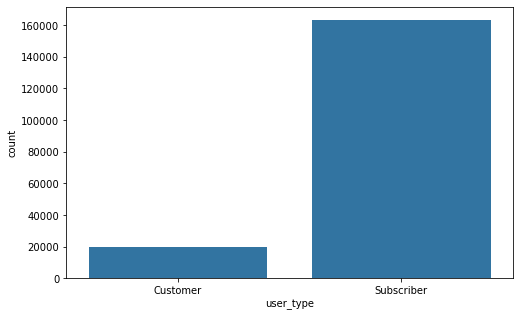

In [21]:
plt.figure(figsize = [8,5])

default_color = sb.color_palette()[0]
sb.countplot(data = df_1, x = 'user_type', color = default_color)

plt.show()

Observation: 
The distribution of user type shows that most of the users of the GoBike service are subscribers, also with relatively much less 20000 users being 'one-time customers'. 

GoBike company can use this info for promotions, campaigns and incentives to keep their subscribers and also promote the number of customers. 

Next we look into the distribution of another variable of interest: member_gender

Question: What does the distribution of the member_gender variable look like?

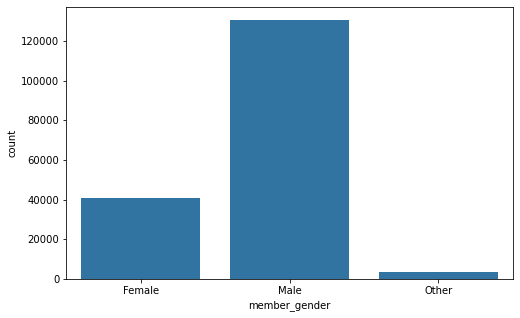

In [22]:
plt.figure(figsize = [8,5])

default_color = sb.color_palette()[0]
sb.countplot(data = df_1, x = 'member_gender', color = default_color)

plt.show()

Observation: The above output shows the distribution of member gender in the dataset. This shows that above 120000 users are male also with about 40000 female users and less than 5000 users identify with other sex categories. 

GoBike company can use this info for directed ads for the various user demographics. 


Next we look into the distribution of another variable of interest: bike_share_for_all_trip

Question: What does the distribution of the bike_share_for_all_trip variable look like?

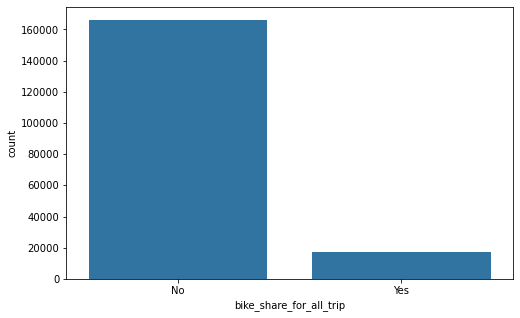

In [23]:
plt.figure(figsize = [8,5])

default_color = sb.color_palette()[0]
sb.countplot(data = df_1, x = 'bike_share_for_all_trip', color = default_color)

plt.show()

Observation: The above output shows the distribution of bike_share_for_all_trip variable. This shows that most users do not use the bike share for trips/rides. 

This info can be use to optimize services and products offered, since most users do not use this feature. Further investigation as to why this happens can also be carried out. 


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration_sec variable took on a large range of values, with a unimodal point at 272.
The initial plot of the duration_sec variable show some immediate points of attention. On the plot, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits on the plot also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data. After investigation we figured that the outliers seem to be valid points as they are quite a number of ride logs with higher duration than 10000 seconds.

The distribution shows that member_birth_year variable is unimodal at the pount 1988, with another point close to the modal value. This indicates that most users were born in the year 1988. 
The boxplot below helps us visualize the member_birth_year distribution better as it shows that most user birth years fall between 1980 and 1994. It also shows that data has some outliers which are probably wrong information, between points 1876 and 1960. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The variables in the dataset showed relativelty usual distributions, aside from the cases of the duration_sec and member_birth_year variables mentioned above. 
In the case of the member_birth_year variable data, the deciphered outliers were removed from the dataset as shown in the code block in that section. 

In [24]:
list(df_1)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

## Bivariate Exploration


In this section, we investigate relationships between pairs of variables in the dataset.

First off, we look at the correlation between user_type and member gender. 

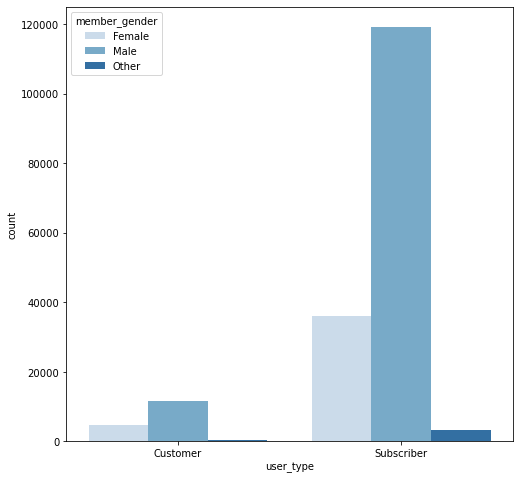

In [25]:

plt.figure(figsize = [8, 8])
sb.countplot(data = df_1, x = 'user_type', hue = 'member_gender', palette = 'Blues')

plt.show()

Observation: The output shows that male users form the highest proportion of both subscriber and customer user types. With female users comprising the a much less proportion and least of all users whom identify as other sex categories. 

Next off, we look at the correlation between user type and bike share for all trip. 

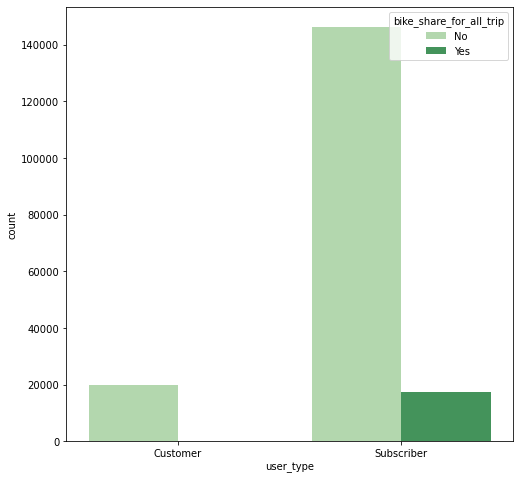

In [26]:
plt.figure(figsize = [8, 8])
sb.countplot(data = df_1, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Greens')

plt.show()

Observation: The output shows that a relatively larger proportion of the subscriber users do not use bike share for all trips. However, it also shows that all the customers (not subscribers) do not use the bike share for all. 

This could indicate a trend showing that all one-time customers do not use bike share feature... this could also mean that the feature is not available to customers , only subscribers. 

Next off, we look at the correlation between member gender and bike share for all trip. 

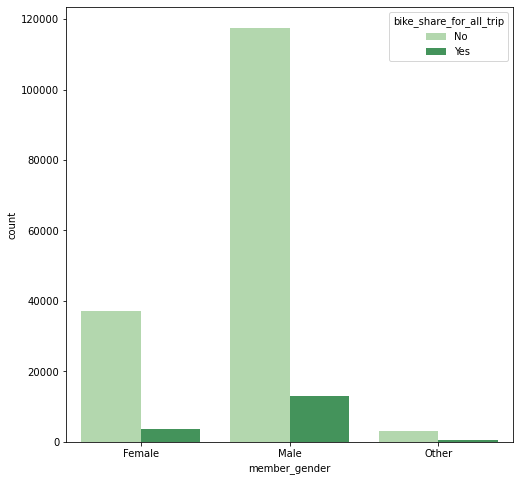

In [27]:
plt.figure(figsize = [8, 8])
sb.countplot(data = df_1, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')

plt.show()

Observation: The output shows that a relatively much larger proportion of the male users do not use bike share for all trips. However, it also shows that for the female and other gender groups, a small proportion of the users use bike share for all trips.

Next off, we look at the correlation between duration_sec and bike_id. 

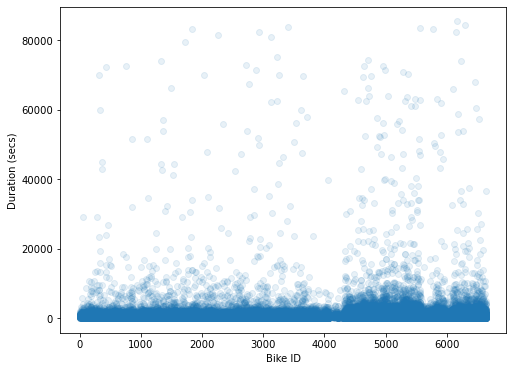

In [28]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df_1, x = 'bike_id', y = 'duration_sec', alpha = 1/10)

plt.xlabel('Bike ID')

plt.ylabel('Duration (secs)')
plt.show()

The above output shows a plot for the various ride durations on each bike (Bike ID). We can see that very few bikes were riden for 20000 seconds and above. 



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The bivariate exploration section looked into realationships and correlations between variable pairs. All but one seemed relativelty usual, with not too much correlation between pairs.  
The output of the bivariate exploration between user_type and bike shows that a relatively larger proportion of the subscriber users do not use bike share for all trips. However, it also shows that all the customers (not subscribers) do not use the bike share for all.

This could indicate a trend showing that all one-time customers do not use bike share feature... this could also mean that the feature is not available to customers , only subscribers.


## Multivariate Exploration


In this section, we look into creating plots of three or more variables and the correlation between them.  

Consider the following three variables; duration_sec, user_type, bike_share_for_all

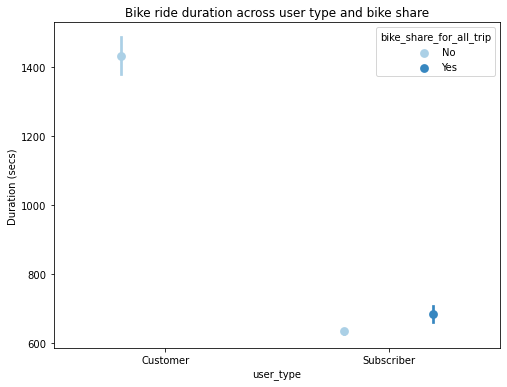

In [29]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_1, x = 'user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Bike ride duration across user type and bike share')
plt.ylabel('Duration (secs)')
#plt.yscale('log')
#plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
#ax.set_yticklabels([],minor = True)
plt.show();

Given the nature of the data and cub columns/ categories within the dataset, there is no concrete correlation between these three variables per se.

Next, we look into the correlation between all the variables plotted against each other. We then observe to see any forming trends or correlations. 

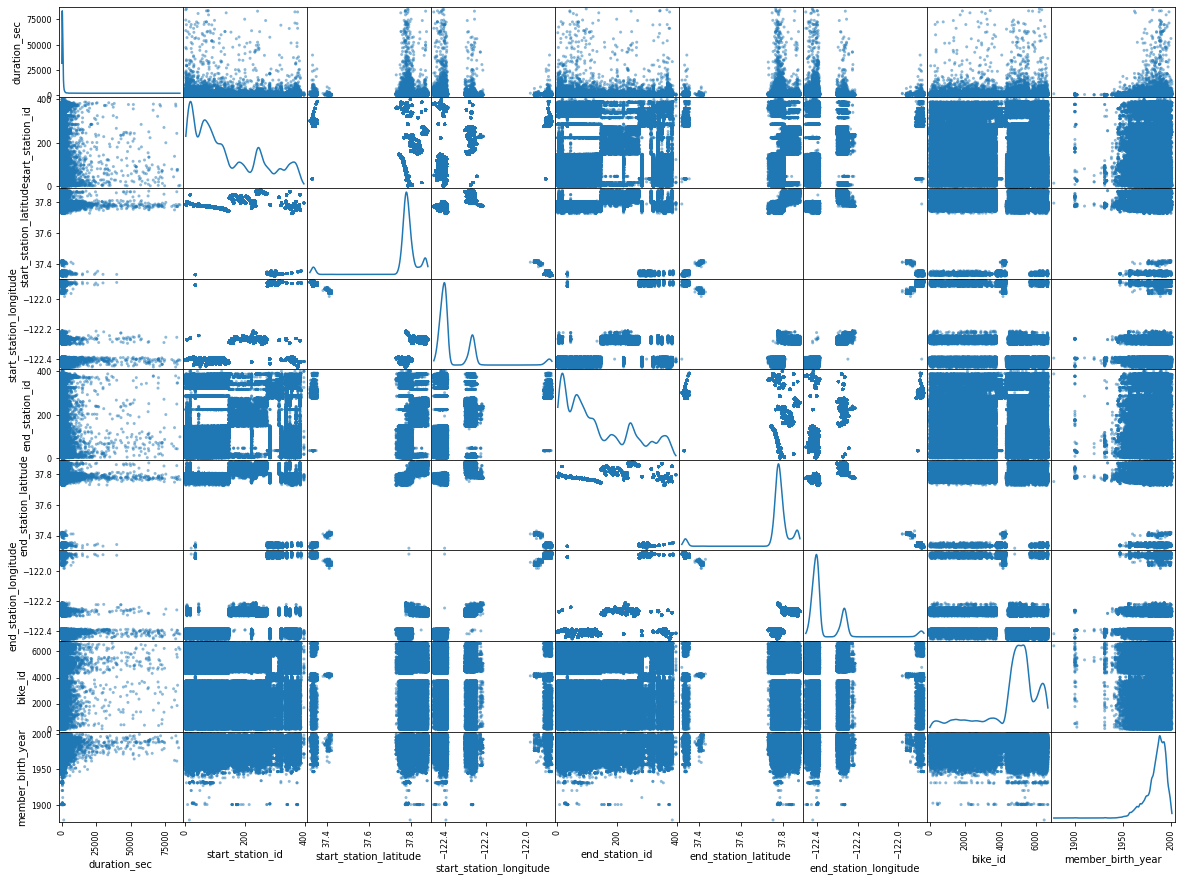

In [30]:
pd.plotting.scatter_matrix(frame = df_1, diagonal="kde",figsize=(20,15))
plt.show();

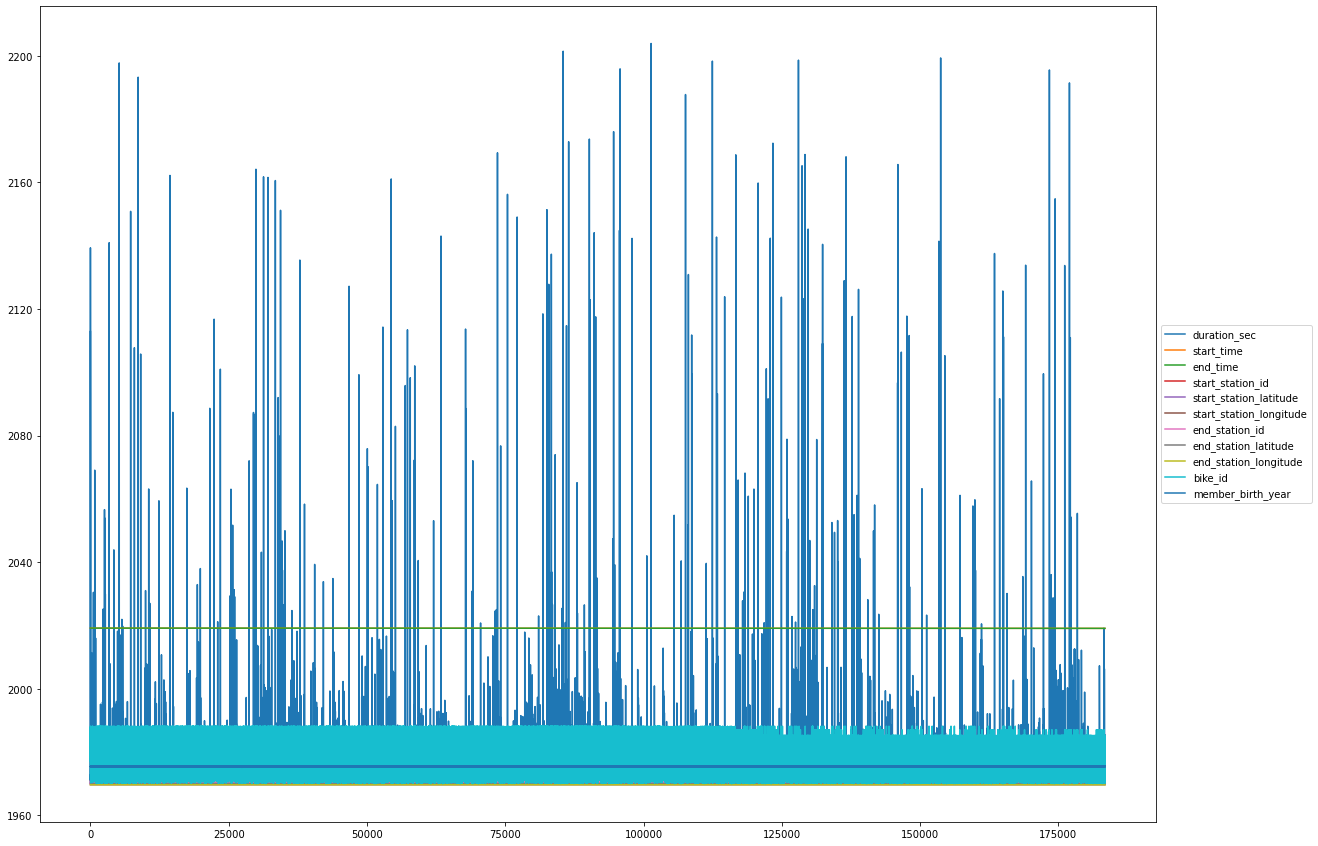

In [31]:
ax = df_1.plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Given the nature of the data and cub columns/ categories within the dataset, there is no concrete correlation between the variables.
However, the above plot shows all the data variables plotted on the same graph.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Given the nature of the dataset and cub columns/ categories within the dataset, there were no concrete correlation or trends observed among the multivariate exploratory analysis. 


## Conclusions

After carrying out univariate, bivariate and multivariate exploratory analysis on the varibales in the GoBike dataset, the following findings have been tentaively inferred;

-  Users like the service and could make use of it for relatively long journeys. i.e duration_sec goes up to 85444 secs
-  The large number of bike stations (start and end) make it easy for users to start and end bike rides anywhere they want. i.e the wide spread for counts on start and end station IDs. 
-  Wide range of users in sex and age demogrphics (with alot more male users than female/other users). Also age range of users is quite wide with users ranging from 21 to almost 64 years. 
-  Most of the users of the GoBike service are subscribers, also with relatively much less 20000 users being 'one-time customers'.
-  Above 120000 users are male also with about 40000 female users and less than 5000 users identify with other sex categories.
-  Most users do not use the bike share for trips/rides. 
-  A relatively larger proportion of the subscriber users do not use bike share for all trips. However, all the customers (not subscribers) do not use the bike share for all. This could also mean that the feature is not available to customers , only subscribers.
